In [6]:
import torch
import torchvision
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Train Model

Patience: This parameter determines the number of epochs to wait before considering early stopping. If the monitored metric doesn't improve for a certain number of epochs (defined by patience), the training process is halted.

Delta: This parameter defines the minimum change in the monitored metric to qualify as an improvement. It helps to prevent early stopping due to small fluctuations in performance.

In [17]:
# EarlyStopping(tolerance=2, min_delta=5)
train_loss = [
    642.14990234,
    601.29278564,
    561.98400879,
    530.01501465,
    497.1098938,
    466.92709351,
    438.2364502,
    413.76028442,
    391.5090332,
    370.79074097,
]
validate_loss = [
    509.13619995,
    497.3125,
    506.17315674,
    497.68960571,
    505.69918823,
    459.78610229,
    480.25592041,
    418.08630371,
    446.42675781,
    372.09902954,
]
######TRAIN
# loss: 642.14990234 : 509.13619995
# loss: 601.29278564 : 497.3125
# loss: 561.98400879 : 506.17315674
# loss: 530.01501465 : 497.68960571
# loss: 497.1098938 : 505.69918823
# loss: 466.92709351 : 459.78610229
# loss: 438.2364502 : 480.25592041
# We are at epoch: 6

In [24]:
# Prepare Dataset
train = torchvision.datasets.MNIST(root='mnist', train=True, download=True)
test= torchvision.datasets.MNIST(root='mnist', train=False, download=True)

x_train = (train.data[100:])/255.0
y_train = train.targets[100:]
x_test = (test.data)/255.0
y_test = test.targets

# change dtype
x_train = x_train.to(torch.float32)
x_test = x_test.to(torch.float32)
y_train = y_train.to(torch.int64)
y_test = y_test.to(torch.int64)

# Normalize dataset
mean = torch.mean(x_train)
std = torch.std(x_train)
x_train = (x_train-mean)/std
x_test = (x_test-mean)/std


train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TensorDataset(x_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

# Define Model
model = nn.Sequential(nn.Linear(28*28,128),
                      nn.ReLU(),
                      nn.Dropout(0.5), 
                      nn.Linear(128,128), 
                      nn.ReLU(),
                      nn.Dropout(0.5),
                      nn.Linear(128,10))

#Loss & Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train & Evaluate
hist_avg_loss_train = []
hist_avg_loss_val = []
patience = 5
delta = 0.002
best_val_loss = float('inf')
counter = 0

# Training loop
for epoch in range(100):
    model.train()
    train_losses = []
    for inputs, labels in train_loader:
        inputs = inputs.reshape(-1,28*28).to(torch.float32)
#         labels = labels.to(torch.int64)
        outputs = model(inputs)
        train_loss = loss_fn(outputs, labels)
        train_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_losses.append(train_loss.item())
    avg_train_loss = sum(train_losses) / len(train_losses)
    hist_avg_loss_train.append(avg_train_loss)
    
    # Validation
    model.eval()
    val_losses = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.reshape(-1,28*28).to(torch.float32)
#             labels = labels.to(torch.int64)
            outputs = model(inputs)
            val_loss = loss_fn(outputs, labels)
            val_losses.append(val_loss.item())
        avg_val_loss = sum(val_losses) / len(val_losses)
        hist_avg_loss_val.append(avg_val_loss)
    
    print(f"Epoch {epoch+1}, Validation Loss: {avg_val_loss}")
    
    # Early stopping check
    if avg_val_loss-delta < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered!")
            break

Epoch 1, Validation Loss: 0.19492316342130966
Epoch 2, Validation Loss: 0.14631244329035661
Epoch 3, Validation Loss: 0.13174901140414796
Epoch 4, Validation Loss: 0.11950209319211874
Epoch 5, Validation Loss: 0.11294092296676081
Epoch 6, Validation Loss: 0.10582698549434638
Epoch 7, Validation Loss: 0.10429340462455419
Epoch 8, Validation Loss: 0.10197493285652559
Epoch 9, Validation Loss: 0.10085581157617508
Epoch 10, Validation Loss: 0.09798437425463348
Epoch 11, Validation Loss: 0.09399712899741332
Epoch 12, Validation Loss: 0.09433698934906275
Epoch 13, Validation Loss: 0.09481926887017336
Epoch 14, Validation Loss: 0.09640984374223052
Epoch 15, Validation Loss: 0.09333065088251072
Epoch 16, Validation Loss: 0.08770786090546352
Epoch 17, Validation Loss: 0.09469420732307443
Epoch 18, Validation Loss: 0.08980878390027744
Epoch 19, Validation Loss: 0.09172669713530737
Epoch 20, Validation Loss: 0.08398339427580499
Epoch 21, Validation Loss: 0.08624688339579827
Epoch 22, Validation L

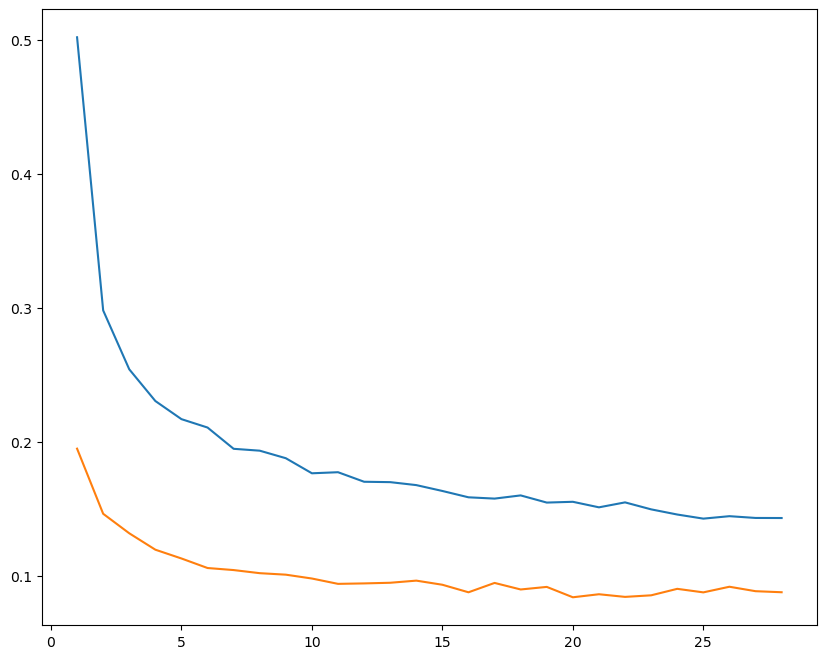

In [25]:
# visualize the loss as the network trained
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(hist_avg_loss_train)+1),hist_avg_loss_train, label='Training Loss')
plt.plot(range(1,len(hist_avg_loss_val)+1),hist_avg_loss_val,label='Validation Loss')

In [45]:
x_test_finanl = (train.data[:90])/255.0
y_test_final = train.targets[:90]

# change dtype
x_test_finanl = x_test_finanl.to(torch.float32)
y_test_final = y_test_final.to(torch.int64)


# Normalize dataset
mean = torch.mean(x_test_finanl)
std = torch.std(x_test_finanl)
x_test_finanl = (x_test_finanl-mean)/std


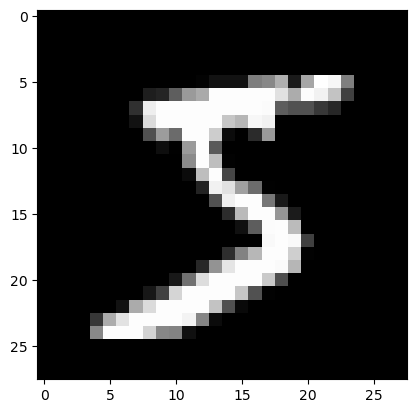

In [49]:
plt.imshow(x_test_finanl[0], cmap='gray')

In [48]:
output = model(x_test_finanl[0].reshape(-1,28*28))
output

tensor([[-52.4849,  -7.9120,  -7.2969,  18.0101, -23.6174,  21.1767, -31.9118,
         -11.0328, -12.7555,   6.0069]], grad_fn=<AddmmBackward0>)

In [51]:
_, preds = torch.max(output, 1)
preds

tensor([5])

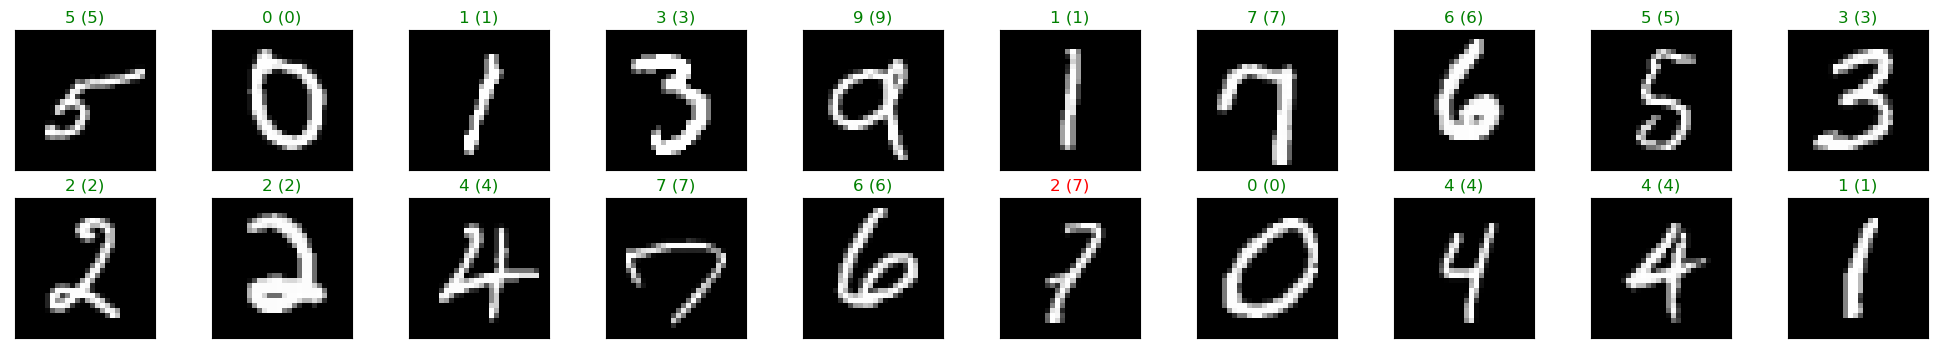

In [58]:
import numpy as np
# obtain one batch of test images
test_finanl_dataset = TensorDataset(x_test_finanl, y_test_final)
test_final_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
images, labels = next(iter(test_final_loader))
imgs = images.reshape(-1,28*28)

# get sample outputs
output = model(imgs)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))